In [2]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
ds=xr.open_dataset('./data/UV_250_50_1000.nc')
ds

c:\Users\Linzy\.conda\envs\py310\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
No module named 'eccodes'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (longitude: 161, latitude: 121, level: 16, time: 8)
Coordinates:
  * longitude  (longitude) float32 120.0 120.2 120.5 120.8 ... 159.5 159.8 160.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 250 300 350 400 450 500 ... 800 850 900 950 1000
  * time       (time) datetime64[ns] 2018-09-11 ... 2018-09-12T18:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-12-02 08:06:20 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
lon=ds['longitude'].data
lat=ds['latitude'].data
height=ds['level'].data[::6]
lats,lons,heights=np.meshgrid(lat,lon,height)

U=ds['u'].data[0,::6,:,:].transpose(2,1,0)
V=ds['v'].data[0,::6,:,:].transpose(2,1,0)
W = np.zeros_like(U)+1
heights.shape,lons.shape,W.shape

((161, 121, 3), (161, 121, 3), (161, 121, 3))

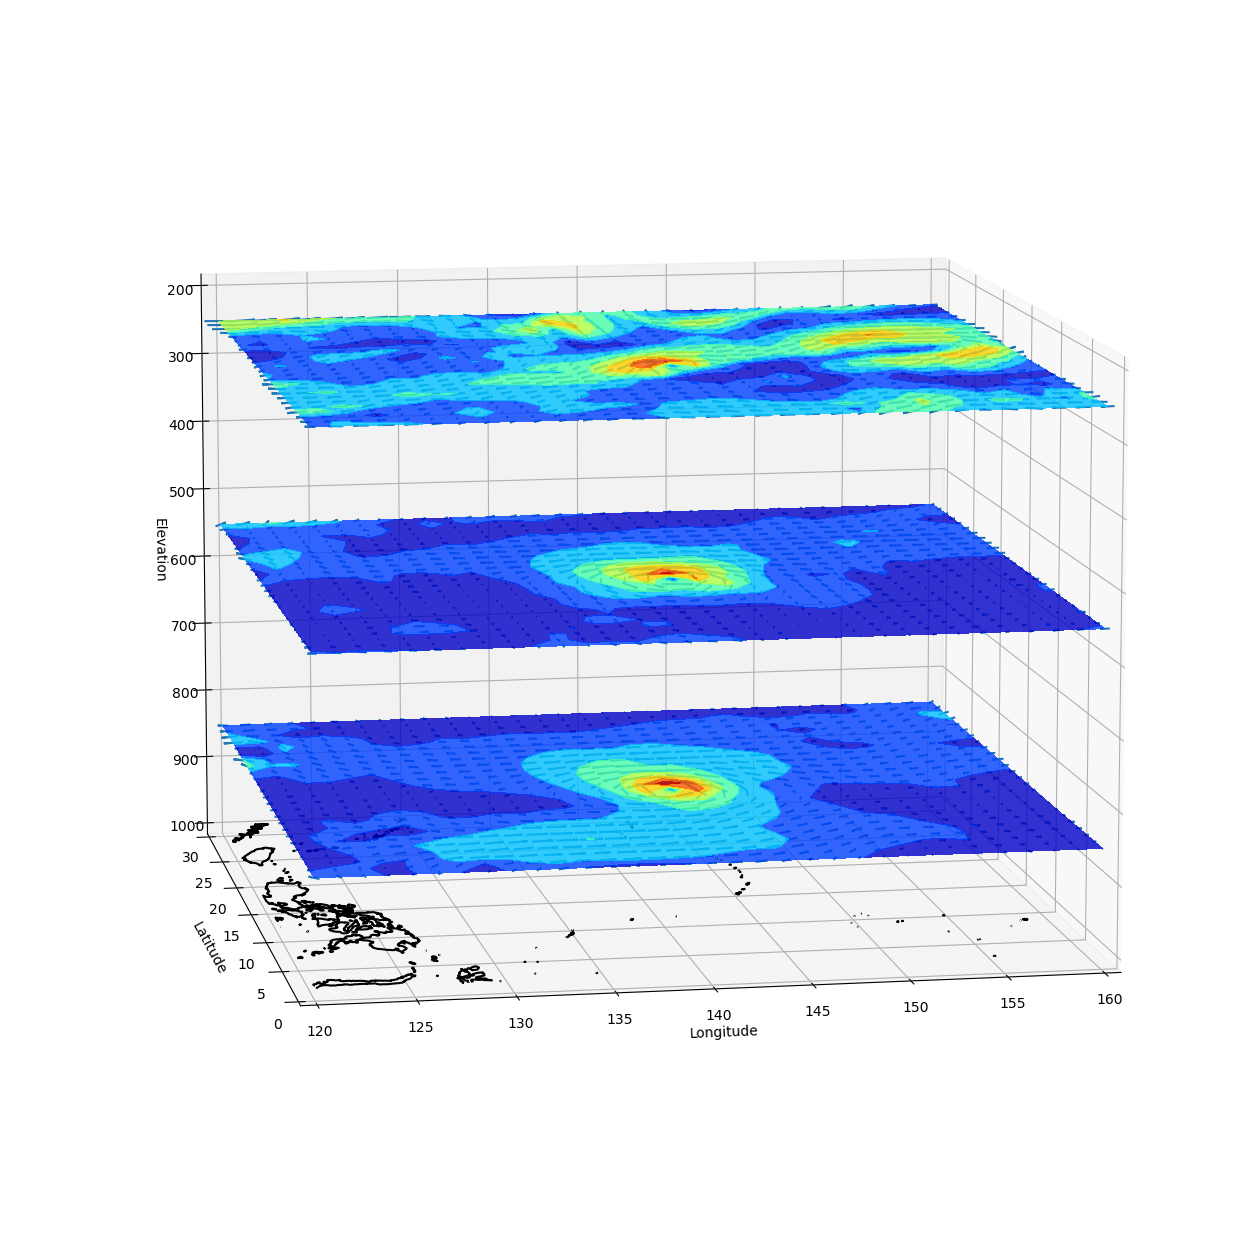

In [104]:
step=5
fig = plt.figure(figsize=(16,16))
ax3d = fig.add_subplot(projection='3d') 
# ax3d.quiver(lons, lats,Z,ds['u'].data[0,0,:,:],ds['v'].data[0,0,:,:],0.2)
# 设置地球投影
projection = ccrs.PlateCarree()

# 创建海岸线特征
land_polygons = cfeature.NaturalEarthFeature('physical', 'land', '10m')
coastlines = cfeature.NaturalEarthFeature('physical', 'coastline', '10m')

# 获取海岸线的线段
coastline_lines = [geom for geom in coastlines.geometries()]

# 设置地图范围
# lonaa.min(),lonaa.max(),lataa.min(),lataa.max()
xlim = (120, 160)
ylim = (0, 30)

# 绘制海岸线
for line in coastline_lines:
    # 过滤出在地图范围内的线段
    filtered_coords = []
    for coord in line.coords:
        lon, lat = coord
        if xlim[0] <= lon <= xlim[1] and ylim[0] <= lat <= ylim[1]:
            filtered_coords.append((lon, lat))
    if len(filtered_coords) > 1:
        coords = np.array(filtered_coords)
        ax3d.add_collection3d(Line3DCollection([np.column_stack((coords, np.full(len(coords),1000)))], edgecolor='black'))
# 设置坐标轴范围
ax3d.set_xlim(xlim)
ax3d.set_ylim(ylim)
# ax3d.set_zlim([-1, 1])
ws_map=[(0,0.5),(0.5,1),(1,1.5),(1.5,2),(2,2.5),(2.5,3),(3,3.5),(3.5,4),(4,100)]
ws=np.sqrt( U[::step,::step,:]**2+ V[::step,::step,:]**2)
ua_norm=U[::step,::step,:]**2/ws
color_map = np.zeros_like(U[::step,::step,:]**2, dtype=float)
for i in range(len(ws_map)):
    color_map[np.where((ws > ws_map[i][0]) & (ws <= ws_map[i][1]))] = i
from matplotlib.colors import Normalize
norm1 = Normalize()
norm1.autoscale(color_map)
# M = np.hypot(U[::step,::step,:], V[::step,::step,:])


ax3d.quiver(lons[::step,::step,:], lats[::step,::step,:], heights[::step,::step,:], U[::step,::step,:], V[::step,::step,:], norm1(color_map),length=0.08, pivot='middle',cmap='jet')

# 填色图
# 250hPa
wh=0
ws=np.sqrt( U[::step,::step,wh]**2+ V[::step,::step,wh]**2)
ax3d.contourf(lons[::step,::step,wh], lats[::step,::step,wh],ws,cmap='jet',offset=height[wh],alpha=0.8)
# 550hPa
wh=1
ws=np.sqrt( U[::step,::step,wh]**2+ V[::step,::step,wh]**2)
ax3d.contourf(lons[::step,::step,wh], lats[::step,::step,wh],ws,cmap='jet',offset=height[wh],alpha=0.8)
# 850hPa
wh=2
ws=np.sqrt( U[::step,::step,wh]**2+ V[::step,::step,wh]**2)
ax3d.contourf(lons[::step,::step,wh], lats[::step,::step,wh],ws,cmap='jet',offset=height[wh],alpha=0.8)
# 设置坐标轴标签
ax3d.set_zlim(200,1000)
ax3d.set_xlabel('Longitude')
ax3d.set_ylabel('Latitude')
ax3d.set_zlabel('Elevation')
ax3d.invert_zaxis()
# 调视角
ax3d.view_init(azim=-100,elev=10)

In [79]:
ds['level'].data[::6],np.where(550==ds['level'].data)

(array([250, 550, 850]), (array([6], dtype=int64),))

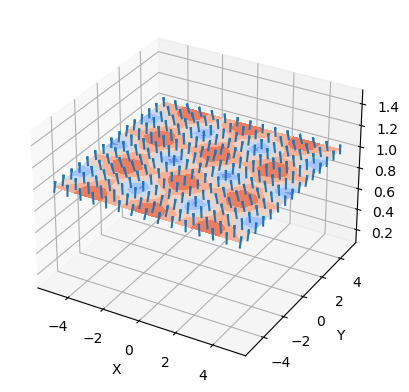

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建数据
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
X, Y = np.meshgrid(x, y)
U = np.cos(X)
V = np.sin(Y)
W = np.zeros_like(X)+1

# 创建3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维风场图
ax.quiver(X, Y, W, U, V, W, length=0.1, pivot='middle')

# 绘制二维切片图
ax.contourf(X, Y, np.sqrt(U**2 + V**2), zdir='z', offset=1, cmap='coolwarm')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

In [83]:
lataa=ds['latitude'].loc[20:10].data
lonaa=ds['longitude'].loc[130:150].data
lonaa.min(),lonaa.max()

(130.0, 150.0)

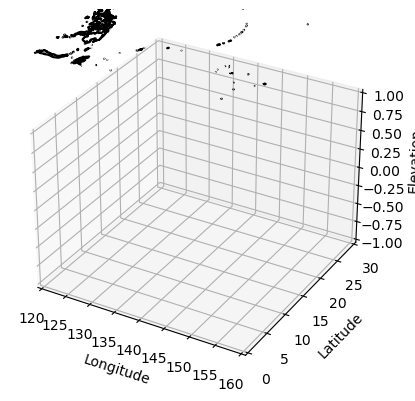

In [86]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 创建3D图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 设置地球投影
projection = ccrs.PlateCarree()

# 创建海岸线特征
land_polygons = cfeature.NaturalEarthFeature('physical', 'land', '10m')
coastlines = cfeature.NaturalEarthFeature('physical', 'coastline', '10m')

# 获取海岸线的线段
coastline_lines = [geom for geom in coastlines.geometries()]

# 设置地图范围
# lonaa.min(),lonaa.max(),lataa.min(),lataa.max()
xlim = (120, 160)
ylim = (0, 30)

# 绘制海岸线
for line in coastline_lines:
    # 过滤出在地图范围内的线段
    filtered_coords = []
    for coord in line.coords:
        lon, lat = coord
        if xlim[0] <= lon <= xlim[1] and ylim[0] <= lat <= ylim[1]:
            filtered_coords.append((lon, lat))
    if len(filtered_coords) > 1:
        coords = np.array(filtered_coords)
        ax.add_collection3d(Line3DCollection([np.column_stack((coords, np.zeros(len(coords))+2))], edgecolor='black'))

# 设置坐标轴范围
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim([-1, 1])

# 设置坐标轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')

# 显示图形
plt.show()